In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, Input, regularizers, Model, backend
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from IPython.display import SVG
import IPython.display as display

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
print(f"Training Data: {train.shape}")
print(f"Testing Data: {test.shape}")

Training Data: (42000, 785)
Testing Data: (28000, 784)


In [4]:
x_train = train.iloc[:, 1:].values.reshape(-1, 28, 28, 1)/255.0
y_train = train.iloc[:, 0].values.reshape(-1, 1)
x_test = test.values.reshape(-1, 28, 28, 1)/255.0
print(f"Training Images: {x_train.shape}")
print(f"Label Images: {y_train.shape}")

Training Images: (42000, 28, 28, 1)
Label Images: (42000, 1)


In [5]:
print(f"Min: {x_train.min()}")
print(f"Min: {x_train.max()}")

Min: 0.0
Min: 1.0


In [8]:
print(f"Training Images Dims: {x_train.shape}, Training Labels Dims: {y_train.shape}")

Training Images Dims: (42000, 28, 28, 1), Training Labels Dims: (42000, 1)


In [9]:
label_counts = y_train.flatten()
vals, counts = np.unique(label_counts, return_counts=True)

for value, count in zip(vals, counts):
    print(f"{value}: {round(count/len(label_counts)*100, 3)}%")

0: 9.838%
1: 11.152%
2: 9.945%
3: 10.36%
4: 9.695%
5: 9.036%
6: 9.85%
7: 10.479%
8: 9.674%
9: 9.971%


In [10]:
## ------------------------- Function to print model Summary -------------------------
def print_model_summary(model):
    total_params = model.count_params()
    trainable_params = np.sum([backend.count_params(w) for w in model.trainable_weights])
    non_trainable_params = np.sum([backend.count_params(w) for w in model.non_trainable_weights])

    print(f'Total params: {total_params:,}')
    print(f'Trainable params: {trainable_params:,}')
    print(f'Non-trainable params: {non_trainable_params:,}')

In [11]:
## ------------------------- Function to Display Model Graphically -------------------------
def display_model(model):
    plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True, dpi=50)
    display.display(display.HTML('<div style="text-align: center;"><img src="model.png" alt="Model Structure"></div>'))

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models

def basic_conv_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1), padding='same'))
    model.add(layers.MaxPool2D((3, 3)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (5, 5), activation='relu', padding='same'))
    model.add(layers.MaxPool2D((2, 2)))
    model.add(layers.BatchNormalization())
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.25))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.25))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(10, activation='softmax'))

    return model

basic_conv_model = basic_conv_model()
basic_conv_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 9, 9, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 9, 9, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 9, 9, 64)       │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 4, 4, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 358,474 (1.37 MB)

 Trainable params: 357,386 (1.36 MB)

 Non-trainable params: 1,088 (4.25 KB)

In [23]:
## ------------------------- BIGGER CONVOLUTION NETWORK -------------------------

def big_conv_model():
    model=models.Sequential()
    # --------------------------------------------------------------------------------
    model.add(layers.Conv2D(64, (5,5), padding='same', input_shape=(28,28,1)))
    model.add(layers.Conv2D(64, (5,5), padding='same'))
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPool2D((3,3)))
    model.add(layers.BatchNormalization())
    # --------------------------------------------------------------------------------
    model.add(layers.Conv2D(128, (3,3), padding='same'))
    model.add(layers.Conv2D(128, (3,3), padding='same'))
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPool2D((2,2)))
    model.add(layers.BatchNormalization())
    # --------------------------------------------------------------------------------
    model.add(layers.Flatten(input_shape=(28,28)))
    # --------------------------------------------------------------------------------
    model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.05)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    # --------------------------------------------------------------------------------
        # model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.5)))
    # model.add(layers.BatchNormalization())
    # model.add(layers.Dropout(0.3))
    # --------------------------------------------------------------------------------
    model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.05)))
    model.add(layers.BatchNormalization())
    # --------------------------------------------------------------------------------
    model.add(layers.Dense(10, activation='softmax'))
    
    return model

In [24]:
big_conv_model = big_conv_model()
print_model_summary(big_conv_model)

Total params: 886,602
Trainable params: 885,450
Non-trainable params: 1,152


In [26]:
### ------------------------- BASIC RESIDUAL NETWORK -------------------------

def residual_model():
    inputs = Input(shape=(28, 28, 1))
    # --------------------------------------------------------------------------------
    x = layers.Conv2D(32, (5, 5), padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    # --------------------------------------------------------------------------------
    skip_connection_1 = layers.Conv2D(64, (3, 3), padding='same')(inputs)
    skip_connection_1 = layers.BatchNormalization()(skip_connection_1)
    ### ------------------------- BASIC RESIDUAL NETWORK -------------------------

def residual_model():
    inputs = Input(shape=(28, 28, 1))
    # --------------------------------------------------------------------------------
    x = layers.Conv2D(32, (5, 5), padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    # --------------------------------------------------------------------------------
    skip_connection_1 = layers.Conv2D(64, (3, 3), padding='same')(inputs)
    skip_connection_1 = layers.BatchNormalization()(skip_connection_1)
#     skip_connection_1 = layers.Activation('relu')(skip_connection_1)
    # --------------------------------------------------------------------------------
    x = layers.Conv2D(64, (3, 3), padding='same')(x)
    x = layers.BatchNormalization()(x)
#     x = layers.Activation('relu')(x)
    # --------------------------------------------------------------------------------
    x = layers.add([x, skip_connection_1])
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    # --------------------------------------------------------------------------------
    x = layers.Conv2D(128, (3, 3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    # --------------------------------------------------------------------------------
    skip_connection_2 = layers.Conv2D(256, (3, 3), padding='same')(x)
    skip_connection_2 = layers.BatchNormalization()(skip_connection_2)
    # --------------------------------------------------------------------------------
    x = layers.Conv2D(256, (3, 3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    # --------------------------------------------------------------------------------
    x = layers.add([x, skip_connection_2])
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    # --------------------------------------------------------------------------------
    x = layers.Flatten()(x)
    # --------------------------------------------------------------------------------
    x = layers.Dense(128, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    # --------------------------------------------------------------------------------
    x = layers.Dense(64, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.25)(x)
    # --------------------------------------------------------------------------------
    outputs = layers.Dense(10, activation='softmax')(x)
    # --------------------------------------------------------------------------------
    model = Model(inputs=inputs, outputs=outputs, name='conv_model')
    return model

residual_model = residual_model()

print_model_summary(residual_model)

Total params: 2,304,074
Trainable params: 2,301,450
Non-trainable params: 2,624


In [27]:
## ------------------------- Function to Train Models -------------------------
def train_model(model):
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=15, batch_size=30, validation_split=0.2)
    return history

In [28]:
## ------------------------- Function to Summarise Model Performance -------------------------
def plot_model_training(history):
    plt.figure(figsize=(14, 5))

    # Training loss vs Validation loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.grid(True)
    # Training vs Validation Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

Epoch 1/15
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.8725 - loss: 0.4172 - val_accuracy: 0.9813 - val_loss: 0.0635
Epoch 2/15
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - accuracy: 0.9743 - loss: 0.0874 - val_accuracy: 0.9869 - val_loss: 0.0448
Epoch 3/15
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - accuracy: 0.9806 - loss: 0.0666 - val_accuracy: 0.9887 - val_loss: 0.0380
Epoch 4/15
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - accuracy: 0.9831 - loss: 0.0549 - val_accuracy: 0.9846 - val_loss: 0.0546
Epoch 5/15
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - accuracy: 0.9869 - loss: 0.0460 - val_accuracy: 0.9907 - val_loss: 0.0362
Epoch 6/15
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - accuracy: 0.9869 - loss: 0.0432 - val_accuracy: 0.9894 - val_loss: 0.0385
Epoch 7/15
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - accuracy: 0.9904 - loss: 0.0333 - val_accuracy: 0.9898 - val_loss: 0.0377
Epoch 8/15
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - accuracy: 0.9901 -

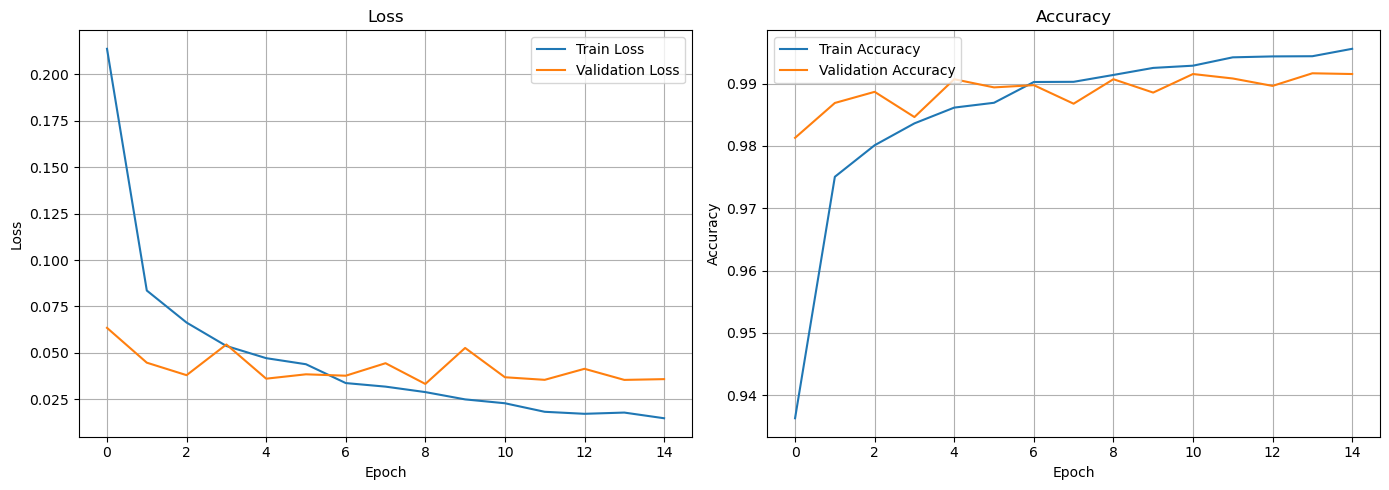

In [29]:
history = train_model(basic_conv_model)
plot_model_training(history)

Epoch 1/15
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 167s 146ms/step - accuracy: 0.8814 - loss: 6.8008 - val_accuracy: 0.9386 - val_loss: 0.7786
Epoch 2/15
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 161s 144ms/step - accuracy: 0.9516 - loss: 0.6963 - val_accuracy: 0.9661 - val_loss: 0.5711
Epoch 3/15
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 152s 136ms/step - accuracy: 0.9587 - loss: 0.5795 - val_accuracy: 0.9527 - val_loss: 0.5744
Epoch 4/15
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 135s 121ms/step - accuracy: 0.9622 - loss: 0.5185 - val_accuracy: 0.9781 - val_loss: 0.4383
Epoch 5/15
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 126s 113ms/step - accuracy: 0.9669 - loss: 0.4449 - val_accuracy: 0.9549 - val_loss: 0.5094
Epoch 6/15
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 134s 120ms/step - accuracy: 0.9685 - loss: 0.4289 - val_accuracy: 0.9858 - val_loss: 0.3366
Epoch 7/15
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 541s 483ms/step - accuracy: 0.9683 - loss: 0.4074 - val_accuracy: 0.9805 - val_loss: 0.3441
Epoch 8/15
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 173s 154ms/step - ac

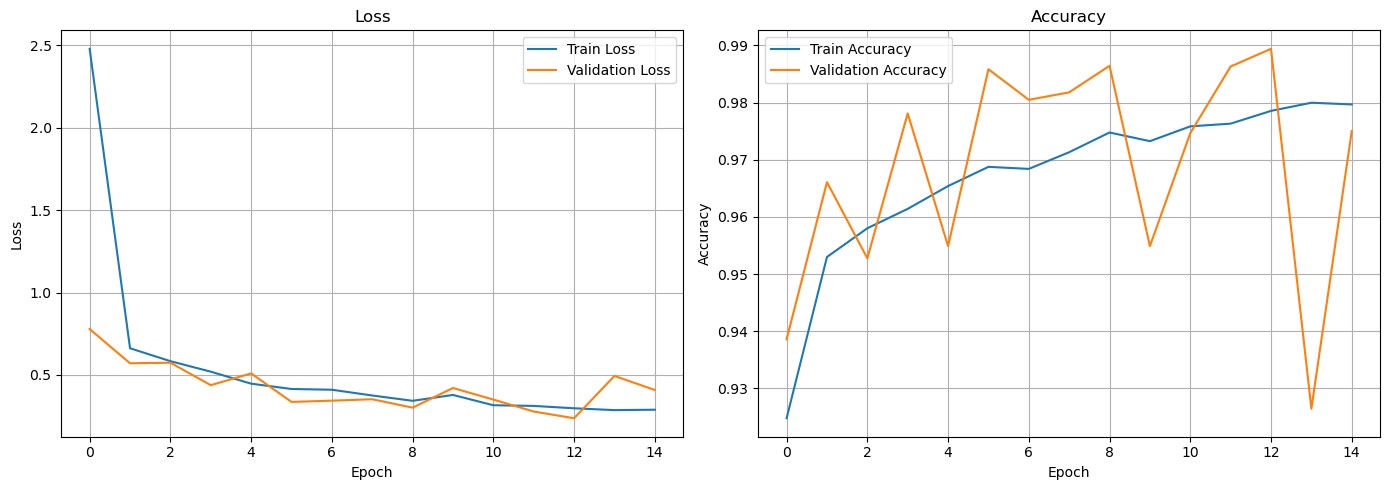

In [30]:
history = train_model(big_conv_model)
plot_model_training(history)

Epoch 1/15
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 355s 311ms/step - accuracy: 0.8545 - loss: 0.4843 - val_accuracy: 0.9606 - val_loss: 0.1209
Epoch 2/15
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 353s 315ms/step - accuracy: 0.9663 - loss: 0.1127 - val_accuracy: 0.9782 - val_loss: 0.0707
Epoch 3/15
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 340s 304ms/step - accuracy: 0.9763 - loss: 0.0807 - val_accuracy: 0.9917 - val_loss: 0.0295
Epoch 4/15
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 338s 301ms/step - accuracy: 0.9792 - loss: 0.0706 - val_accuracy: 0.9913 - val_loss: 0.0314
Epoch 5/15
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 291s 260ms/step - accuracy: 0.9805 - loss: 0.0640 - val_accuracy: 0.9910 - val_loss: 0.0291
Epoch 6/15
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 47958s 43s/step - accuracy: 0.9857 - loss: 0.0488 - val_accuracy: 0.9911 - val_loss: 0.0351
Epoch 7/15
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 389s 347ms/step - accuracy: 0.9842 - loss: 0.0539 - val_accuracy: 0.9913 - val_loss: 0.0300
Epoch 8/15
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 360s 321ms/step - ac

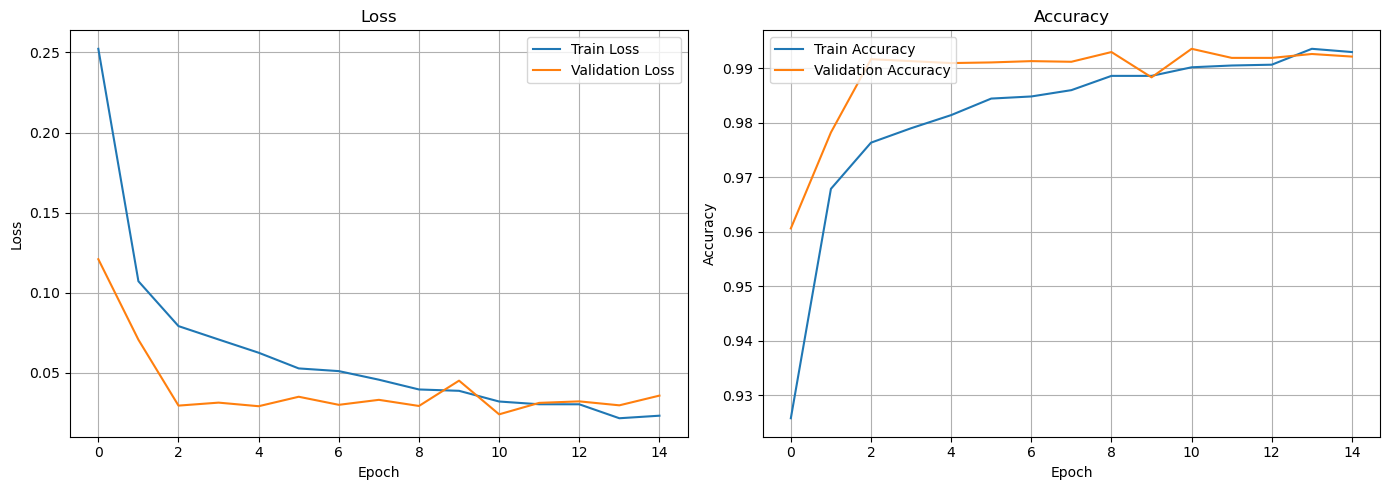

In [31]:
history = train_model(residual_model)
plot_model_training(history)

In [32]:
best_model = residual_model
predictions = np.argmax(best_model.predict(x_test), axis=1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 60s 68ms/step


In [33]:
predictions.shape

(28000,)

In [34]:
## ------------------------- Function to Show Predictions -------------------------
def print_predictions(model, x_test, num_predictions=64):
    predictions = model.predict(x_test)

    fig, axes = plt.subplots(8, 8, figsize=(15, 15))

    for i, ax in enumerate(axes.flat):
        prediction = predictions[i]
        predicted_class = np.argmax(prediction)
        
        ax.imshow(x_test[i].reshape(28, 28), cmap='gray')
        ax.set_title(f"Predicted: {predicted_class}")
        ax.axis('off')

    plt.show()

875/875 ━━━━━━━━━━━━━━━━━━━━ 67s 77ms/step


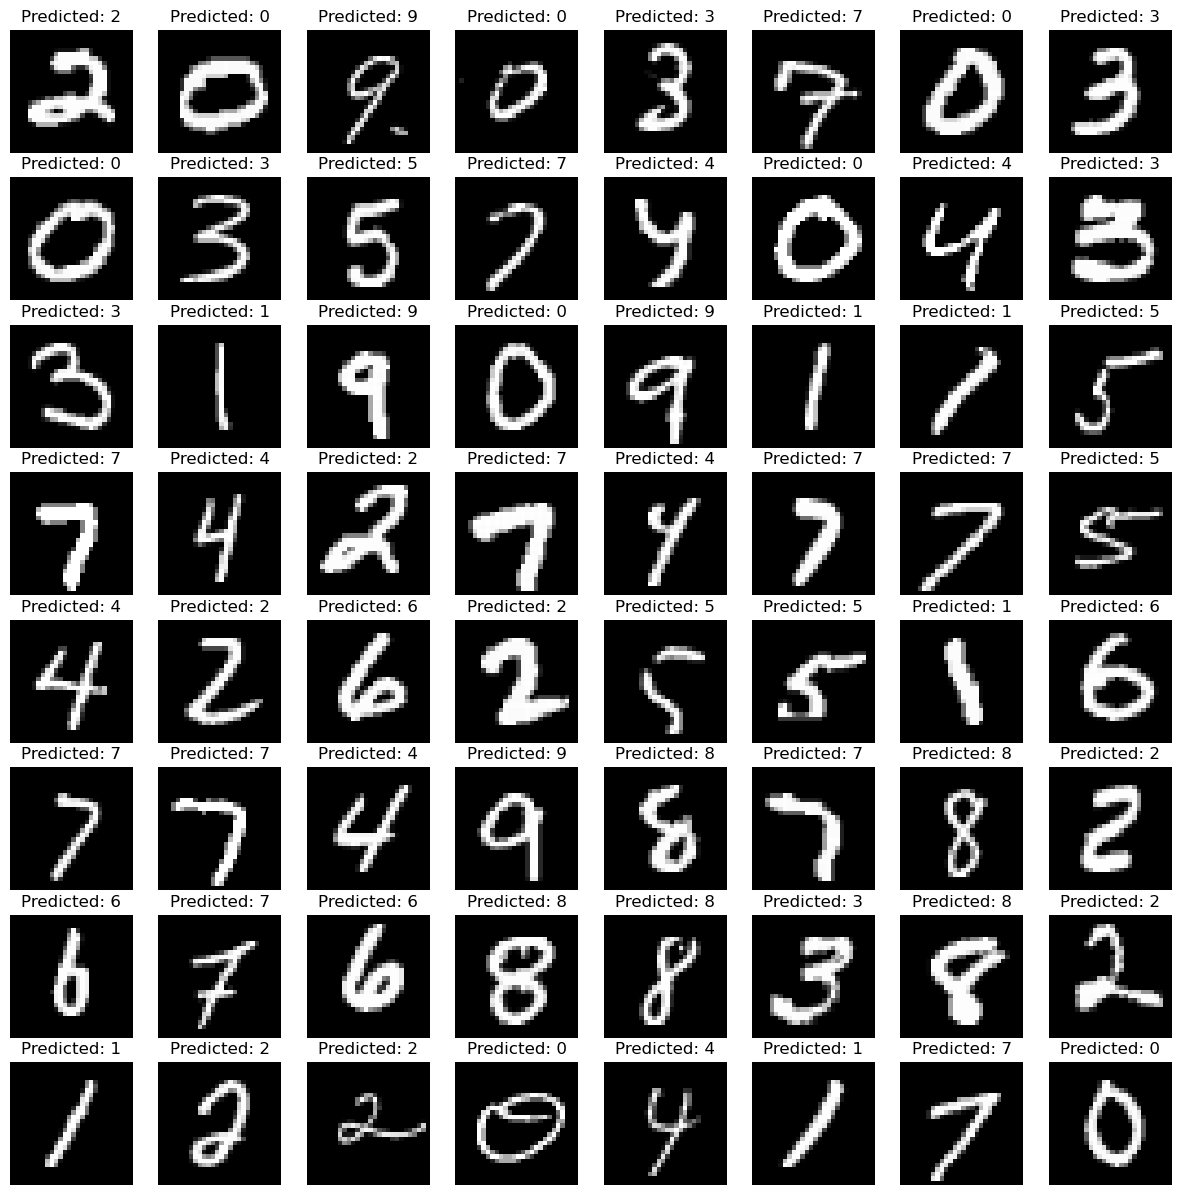

In [35]:
print_predictions(best_model, x_test)

In [37]:
sample = pd.read_csv("sample_submission.csv")
sample.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [39]:
submission = pd.DataFrame({'ImageId': np.arange(1, 28001), 'Label': predictions})
submission.to_csv('submission.csv', index=False)